<a href="https://colab.research.google.com/github/kanakhan/GMSW/blob/main/%ED%95%9C%EA%B8%80NLP%EC%A0%84%EC%B2%B4(%EC%88%98%EC%97%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글자연어처리(NLP 전체 과정]

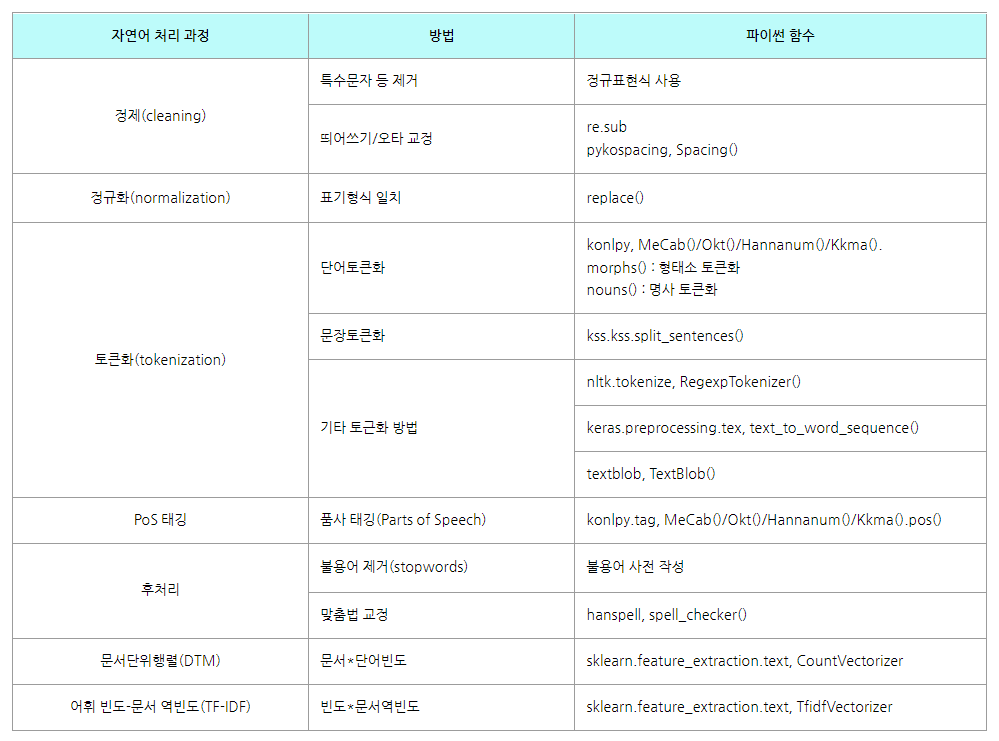



> 분석할 데이터



In [1]:
corpus = ["내일은 내일 의 태양이 뜬다.",
          "피할수 없으면 즐겨라",
          "1 퍼센트의 가능성, 그것이 나의 길이다.",
          "행복은 습관이다,그것을 몸에 지니라.",
          "<title>분석돌이</title> 프로그램이 짜는 것은 너무 어렵다ㅠㅠㅠ. 도움이 필요하면 python@naver.com으로 연락주세요ㅎㅎ!"]

### 정제(cleaning) 및 정규화(nomalization)

###### 불필요한 단어 삭제 및 수정
* HTML, XML 테그, 이메일 주소 등에 포함된 특수 기호들을 일반적으로 토큰화하기 전에 제거

* re(Regular Expression) sub(Substitution) 함수를 이용하면 빠르고 깔끔하게 제거

In [2]:
import re

def text_clean(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern, '', text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern, '', text)
    pattern = '[a-zA-Z0-9]'    # 숫자와 알파벳 제거
    text = re.sub(pattern, '', text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern, '', text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern, '', text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern, '', text)
    return text 

In [4]:
corpus = list(map(lambda x : text_clean(x), corpus))
corpus

['내일은 내일 의 태양이 뜬다',
 '피할수 없으면 즐겨라',
 ' 퍼센트의 가능성 그것이 나의 길이다',
 '행복은 습관이다그것을 몸에 지니라',
 '분석돌이 프로그램이 짜는 것은 너무 어렵다 도움이 필요하면 으로 연락주세요']

###### 띄어쓰기 교정

* PyKoSpacing에서 Spacing() 함수
* !pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [3]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-1vbws6ul
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-1vbws6ul
     |████████████████████████████████| 511.8 MB 25 kB/s 
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2268637 sha256=6b4f6ddc61e10d08df9456ad12f901014c4227b3695e0eddcd46dba6bdbf64dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-hm6ek21s/wheels/79/a0/33/16f2cd03d21f76a663f5d69a0b96f0351335385349136fbd03
Successfully built pykospacing
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


In [5]:
from pykospacing import Spacing

spacing = Spacing()
corpus = list(map(lambda x : spacing(x), corpus))
corpus

1/1 [==============================] - 0s 31ms/step


['내일은 내일 의 태양이 뜬다',
 '피할 수 없으면 즐겨라',
 '퍼센트의 가능성 그것이 나의 길이다',
 '행복은 습관이 다 그것을 몸에 지니라',
 '분석 돌이 프로그램이 짜는 것은 너무 어렵다 도움이 필요하면 으로 연락주세요']

###### 맞춤법 교정

* Py-Hanspell은 네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지
* !pip install git+https://github.com/ssut/py-hanspell.git

In [6]:
!pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-ama4vis5
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-ama4vis5
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4870 sha256=a1237ca25b811ef3267abf07f6762a162fdbde4e0aca0f6ed80b47b554bf0ea0
  Stored in directory: /tmp/pip-ephem-wheel-cache-9zfyveyu/wheels/3f/a5/73/e4d2806ae141d274fdddaabf8c0ed79be9357d36bfdc99e4b4
Successfully built py-hanspell


In [7]:
from hanspell import spell_checker

corpus = list(map(lambda x : spell_checker.check(x).checked, corpus))
corpus

['내일은 내일의 태양이 뜬다',
 '피할 수 없으면 즐겨라',
 '퍼센트의 가능성 그것이 나의 길이다',
 '행복은 습관이 다 그것을 몸에 지니라',
 '분석 돌이 프로그램이 짜는 것은 너무 어렵다 도움이 필요하 면으로 연락 주세요']

### 한글토큰화

###### 단어토큰화

* KoNLPyd의 메캅(Mecab)


In [8]:
# 한글 자연어 처리기 설치
!pip install konlpy    
      
# 한글 형태소 분석기인 Mecab 설치
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 571 kB/s 
     |████████████████████████████████| 465 kB 60.1 MB/s 
Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bi

In [9]:
from konlpy.tag import Mecab

mecab = Mecab()

tokens_morphs = list(map(lambda x : mecab.morphs(x), corpus))
tokens_nouns = list(map(lambda x : mecab.nouns(x), corpus))

In [10]:
print("형태소: ", tokens_morphs)
print("명사: ", tokens_nouns)

형태소:  [['내일', '은', '내일', '의', '태양', '이', '뜬다'], ['피할', '수', '없', '으면', '즐겨라'], ['퍼센트', '의', '가능', '성', '그것', '이', '나', '의', '길', '이', '다'], ['행복', '은', '습관', '이', '다', '그것', '을', '몸', '에', '지니', '라'], ['분석', '돌', '이', '프로그램', '이', '짜', '는', '것', '은', '너무', '어렵', '다', '도움', '이', '필요', '하', '면', '으로', '연락', '주세', '요']]
명사:  [['내일', '내일', '태양'], ['수'], ['퍼센트', '가능', '그것', '나', '길'], ['행복', '습관', '그것', '몸'], ['분석', '돌', '프로그램', '것', '도움', '필요', '연락', '주세']]


###### 불용어처리

* 직접 불용어를 정의한 불용어 사전을 이용해서 불용어를 제거

In [11]:
stop_words = "은 이 의 다 에 면 으로 요"
stop_words = stop_words.split(' ')

### Bag of Words(BoW): 임베딩(embedding)

* Bag of Words란 단어들의 순서와 상관없이 출현 빈도(frequency)만 계산하는 방법

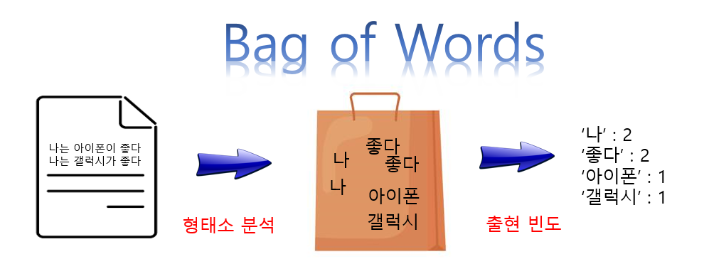

* 띄어쓰기 기준으로 단어수 계산
* sklearn 패키지에서 CountVectorizer() 함수를 불러와 단어 빈도를 계산

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

tokens = list(map(lambda x : " ".join(x), tokens_morphs))

vector = CountVectorizer(stop_words = stop_words)

bow = vector.fit_transform(tokens)

print(bow.toarray())
print(vector.vocabulary_)

[[0 0 2 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0]]
{'내일': 2, '태양': 14, '뜬다': 5, '피할': 17, '으면': 10, '즐겨라': 12, '퍼센트': 15, '가능': 0, '그것': 1, '행복': 19, '습관': 7, '지니': 13, '분석': 6, '프로그램': 16, '너무': 3, '어렵': 8, '도움': 4, '필요': 18, '연락': 9, '주세': 11}


### 문서 단어 행렬(DTM)

* 비정형 데이터를 테이블 형 데이터로 변환시켜주는 과정이 문서 단어 행렬 DTM(Document-Term Matrix)
* DTM은 행(row)가 문서나 문장이 되고 열(column)이 단어로 구성
* 문장*단어로 구성된 메트릭스에 해당 셀(cell)은 단어의 출연 빈도나 등장 유무(0 또는 1)의 값을 갖게 됨.

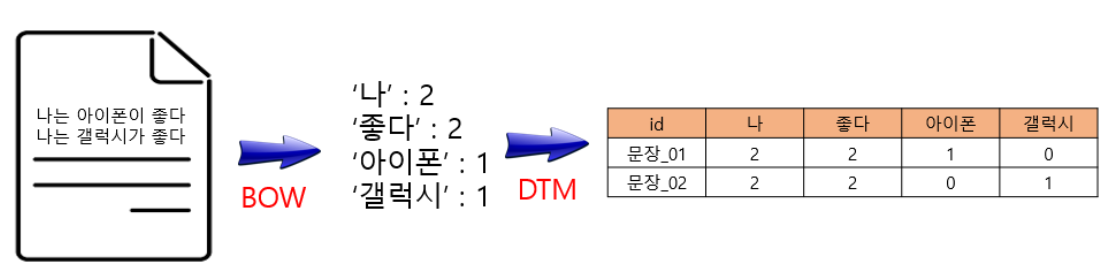

### 어휘 빈도-문서 역빈도(TF-IDF) 분석

* 어휘 빈도-문서 역빈도(TF-IDF; Term Frequency-Inverse Docunment Frequency)는 단순히 빈도수가 높은 단어가 핵심어가 아닐 수도 있다고 가정
* 다른 문서와 달리 특정 문서에서만 집중적으로 등장하는 단어가 그 문서의 핵심어라는 것
* scikit-learn의 tfidfvectorizer 이용

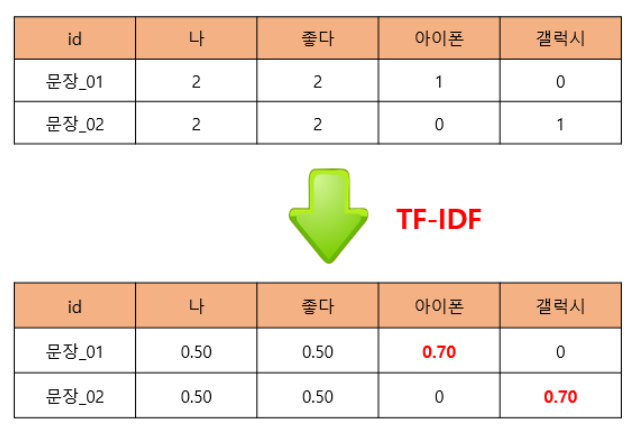

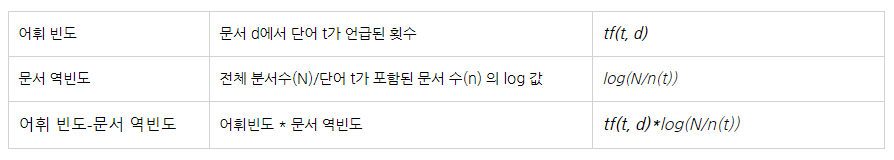

In [15]:
import pandas as pd

columns = []

for k, v in sorted(vector.vocabulary_.items(), key = lambda item : item[1]):
  columns.append(k)

df = pd.DataFrame(bow.toarray(), columns = columns)
df

,가능,그것,내일,너무,도움,뜬다,분석,습관,어렵,연락,으면,주세,즐겨라,지니,태양,퍼센트,프로그램,피할,필요,행복
0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0


In [16]:
columns

['가능',
 '그것',
 '내일',
 '너무',
 '도움',
 '뜬다',
 '분석',
 '습관',
 '어렵',
 '연락',
 '으면',
 '주세',
 '즐겨라',
 '지니',
 '태양',
 '퍼센트',
 '프로그램',
 '피할',
 '필요',
 '행복']

In [17]:
bow.toarray()

array([[0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]])